In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [32]:
!pip install wordcloud

In [33]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')

In [34]:
df.head(3)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [35]:
df=df[["class","message"]]

In [36]:
df.head(2)

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [37]:
df["Label"]=df["class"].map({"ham":0,"spam":1})

In [38]:
df.head(3)

,class,message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1


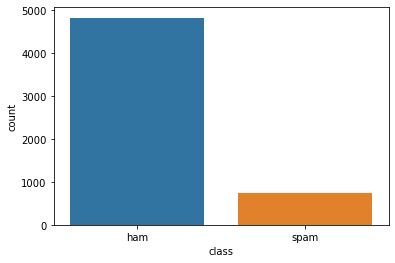

In [39]:
sns.countplot(x=df["class"]);

In [40]:
df['message']=df['message'].str.lower() # küçük harfe çevirdik
df['message']=df['message'].str.replace('[^\w\s]','') #noktalama işaretlerini kaldırdık
df['message']=df['message'].str.replace('\d+','') # rakamları kaldırdık
df['message']=df['message'].str.replace('\n','').replace('\r',"")

In [41]:
df.head(3)

,class,message,Label
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in a wkly comp to win fa cup final...,1


In [42]:
from wordcloud import STOPWORDS
from PIL import Image

In [43]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloudy_mask.png"))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

In [44]:
ham=df[df["class"]=='ham']['message']
spam=df[df["class"]=='spam']['message']

In [45]:
wc(ham,'white')

FileNotFoundError: [Errno 2] No such file or directory: 'cloudy_mask.png'

<Figure size 720x720 with 0 Axes>

In [46]:
x=df["message"]
y=df["Label"]

In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [48]:
vect=CountVectorizer(stop_words="english")

In [49]:
x=vect.fit_transform(x)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.15)


In [51]:
mb=MultinomialNB()

In [52]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [53]:
accuracy_score(tahmin,y_test)

0.972488038277512

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
d=DecisionTreeClassifier()

In [56]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
tahmin2=d.predict(x_test)

In [58]:
accuracy_score(tahmin2,y_test)

0.9700956937799043